In [1]:
%%capture

import os
os.chdir("..")

from dotenv import load_dotenv
load_dotenv()

from IPython.display import Markdown, display
import json

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
agent = experiment_utils.create_xai_agent(
    agent_type="agreement_planner",
    llm_tag="grok-2-vision",
    api_key=os.getenv("XAI_API_KEY"),
)

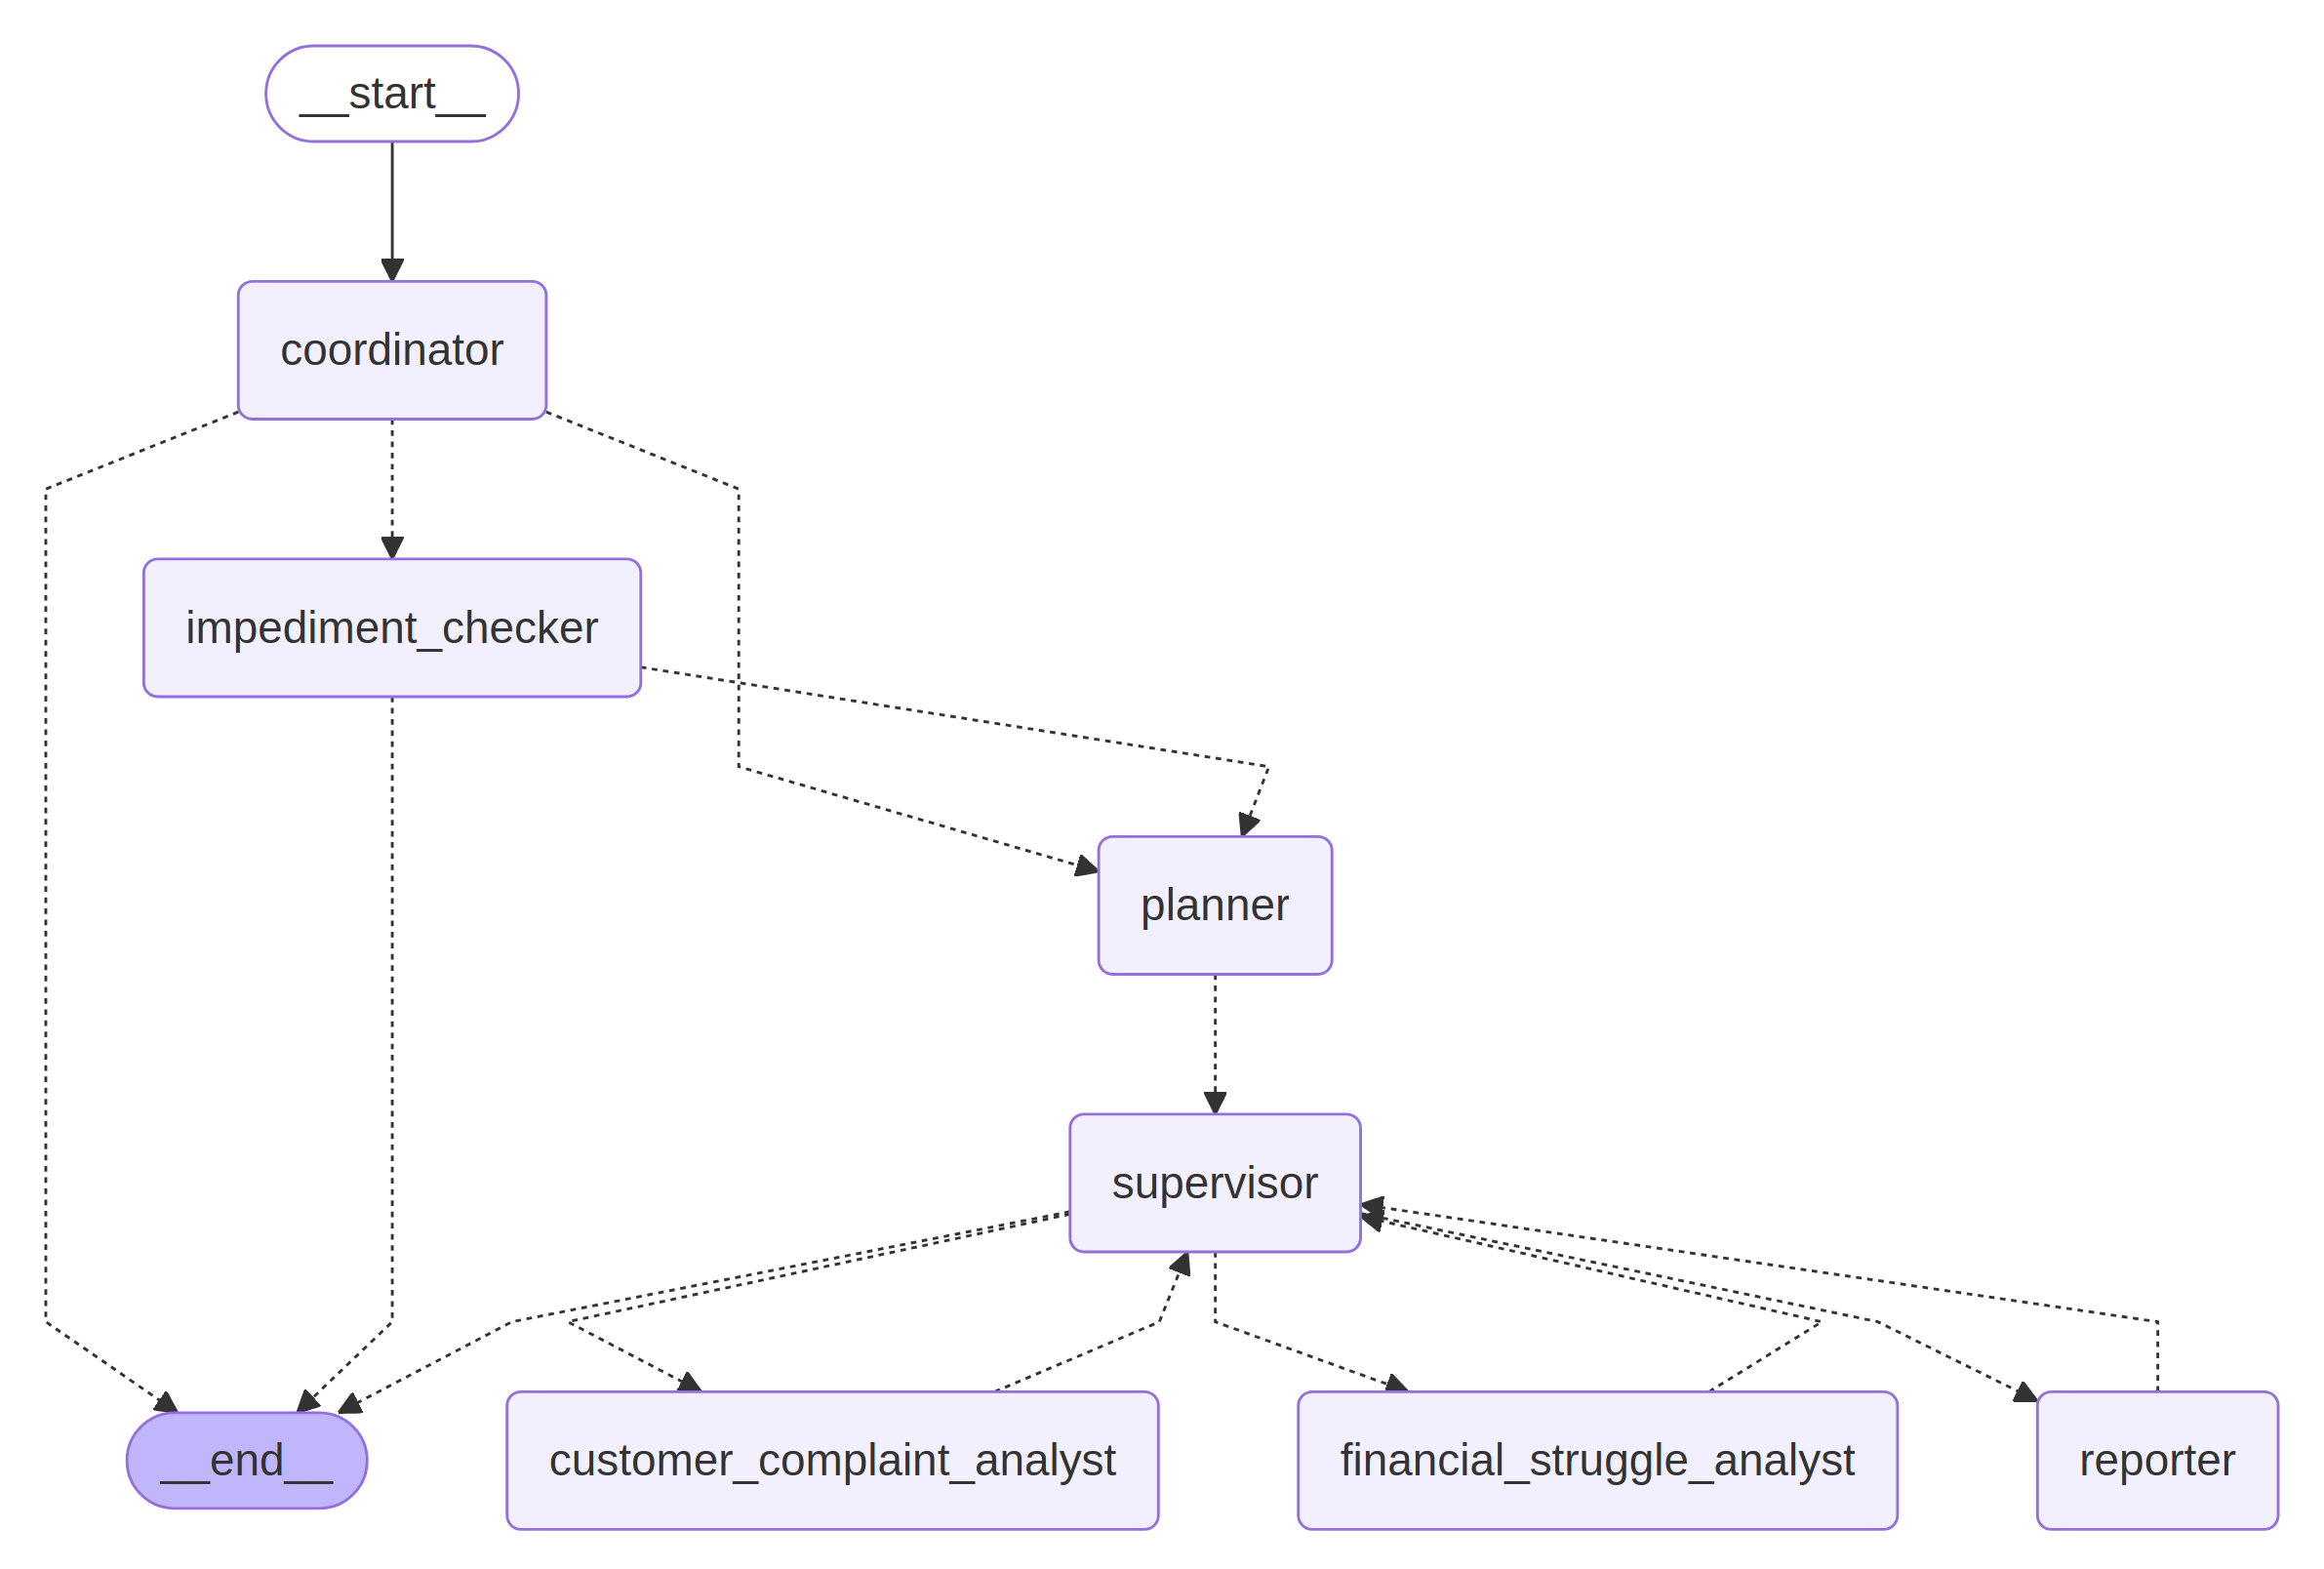

In [3]:
# get agent instance
agreement_planner_agent = container.agreement_planner_agent()

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

# get config
agent_config = agreement_planner_agent.get_config(agent["id"])

# Create Graph
workflow_builder = agreement_planner_agent.get_workflow_builder(
    agent["id"]
)
workflow = workflow_builder.compile(checkpointer=checkpointer)
experiment_utils.print_graph(workflow)

In [4]:
message_content = "Olá, me chamo bruno e tenho dívidas de hipoteca, pago uma taxa de 1,89% ao ano, total 225000,00 parcela mensal de 810. financiamento de 25 anos, com 5 anos pagos. qual melhor estrategia?"
message = MessageRequest(
    message_role="human",
    message_content=message_content,
    agent_id=agent["id"],
)

inputs = agreement_planner_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)
ai_message_content, workflow_state = (
    agreement_planner_agent.format_response(result)
)

In [5]:
display(Markdown(ai_message_content))

```markdown
# Estratégia para Gerenciar Dívida de Hipoteca de Bruno

## Executive Summary

Bruno possui uma hipoteca com um saldo de R$225.000,00, uma taxa de juros anual de 1,89%, e uma parcela mensal de R$810,00. O financiamento é de 25 anos, com 5 anos já pagos. Este relatório analisa a situação financeira de Bruno e sugere estratégias para gerenciar sua dívida de forma eficiente.

## Key Findings

- **Saldo da Dívida**: R$225.000,00
- **Taxa de Juros Anual**: 1,89%
- **Parcela Mensal**: R$810,00
- **Prazo Total do Financiamento**: 25 anos
- **Tempo Já Pago**: 5 anos
- **Categoria de Risco**: **medium_financial_risk**

## Detailed Analysis

### Identificação das Fontes de Dívida

- **Hipoteca**: 
  - **Valor Total**: R$225.000,00
  - **Taxa de Juros**: 1,89% ao ano
  - **Parcela Mensal**: R$810,00
  - **Prazo Total**: 25 anos
  - **Tempo Pagamento**: 5 anos

### Profiling da Exposição ao Risco

- **Categoria de Risco**: **medium_financial_risk**
  - **Justificativa**: A taxa de juros é relativamente baixa, mas o prazo de pagamento ainda é longo, o que pode expor Bruno a riscos de mercado e mudanças financeiras pessoais. No entanto, o pagamento consistente dos últimos 5 anos sugere uma estabilidade financeira moderada.

### Avaliação de Opções de Liquidação

1. **Continuar Pagamento Normal**:
   - **Vantagem**: Mantém a previsibilidade e o baixo risco de mudança nos termos.
   - **Desvantagem**: Longo prazo de pagamento que pode ser oneroso ao longo do tempo.

2. **Refinanciamento**:
   - **Vantagem**: Potencialmente reduz a taxa de juros ou o prazo do financiamento, diminuindo o custo total.
   - **Desvantagem**: Custos de transação e possível aumento no risco se as condições do mercado mudarem desfavoravelmente.

3. **Venda da Propriedade**:
   - **Vantagem**: Liquidação imediata da dívida se o mercado imobiliário permitir um bom retorno.
   - **Desvantagem**: Perda do imóvel e possíveis custos de transição para uma nova moradia.

4. **Negociação com o Credor**:
   - **Vantagem**: Possibilidade de obter melhores condições ou uma redução temporária nas parcelas.
   - **Desvantagem**: Depende da disposição do credor e pode afetar o crédito de Bruno.

### Ferramentas Utilizadas para Avaliação

- **Calculadora de Amortização**: Usada para projetar os pagamentos restantes e o impacto de diferentes estratégias.
- **Simulador de Refinanciamento**: Avaliou possíveis taxas de juros atuais no mercado para comparar com a taxa atual de Bruno.

## Conclusions and Recommendations

1. **Refinanciamento**: Considerar o refinanciamento se as taxas de juros atuais no mercado forem menores que 1,89%. Isso poderia reduzir o custo total do empréstimo e possivelmente o prazo de pagamento, melhorando a gestão da dívida.

2. **Negociação com o Credor**: Entrar em contato com o credor para discutir possíveis ajustes nas condições do empréstimo, como uma redução temporária das parcelas se houver uma mudança na situação financeira de Bruno.

3. **Revisão Anual**: Reavaliar a situação financeira anualmente para ajustar a estratégia conforme necessário, considerando mudanças nas taxas de juros, no mercado imobiliário, ou na situação pessoal de Bruno.

4. **Planejamento Financeiro**: Implementar um plano financeiro pessoal para aumentar a poupança e reduzir outras dívidas, proporcionando maior capacidade de pagamento ou liquidação da hipoteca.

Este relatório foi gerado com base na situação financeira atual de Bruno e nas ferramentas de análise financeira disponíveis. As recomendações visam melhorar a gestão da dívida, reduzindo o risco financeiro e proporcionando uma estratégia viável para o longo prazo.

---

*Data do Relatório: Tue May 13 2025 18:29:55*
```

In [6]:
display(
    Markdown(
        f"**Execution Plan:**\n```json\n{json.dumps(workflow_state.get('execution_plan'), ensure_ascii=False, indent=2)}\n```"
    )
)

**Execution Plan:**
```json
{
  "thought": "Bruno está procurando a melhor estratégia para lidar com suas dívidas de hipoteca, que incluem um financiamento de 25 anos com 5 anos já pagos, uma taxa de juros anual de 1,89%, um saldo total de R$225.000,00 e uma parcela mensal de R$810,00. Precisamos analisar sua situação financeira para sugerir a melhor abordagem.",
  "title": "Estratégia para Gerenciar Dívida de Hipoteca de Bruno",
  "steps": [
    {
      "agent_name": "financial_struggle_analyst",
      "title": "Análise Financeira da Dívida de Hipoteca",
      "description": "**Responsibility**: Analisar a situação financeira de Bruno, incluindo a exposição financeira, fontes de dívida, opções de liquidação e aconselhamento financeiro.\n**Output**: Um relatório em markdown detalhando a análise financeira.\n**Note**: Focar na viabilidade de continuar o financiamento, possíveis renegociações, ou outras formas de liquidação."
    },
    {
      "agent_name": "reporter",
      "title": "Relatório Final",
      "description": "**Responsibility**: Compilar e apresentar o relatório final baseado na análise financeira.\n**Output**: Um relatório profissional que resume a análise e sugere a melhor estratégia para Bruno."
    }
  ]
}
```

In [7]:
display(
    Markdown(
        f"**Agreement Plan:**\n```json\n{json.dumps(workflow_state.get('agreement_plan'), ensure_ascii=False, indent=2)}\n```"
    )
)

**Agreement Plan:**
```json
{
  "created_by": "financial_struggle_analyst",
  "title": "Estratégia para Gerenciar Dívida de Hipoteca de Bruno",
  "description": "### Executive Summary\n\nBruno possui uma hipoteca com um saldo de R$225.000,00, uma taxa de juros anual de 1,89%, e uma parcela mensal de R$810,00. O financiamento é de 25 anos, com 5 anos já pagos. Após análise, foi determinado que Bruno está na categoria de **medium_financial_risk** devido ao prazo restante e à estabilidade dos pagamentos, mas com espaço para melhorias na gestão da dívida.\n\n### Detailed Analysis\n\n#### Identificação das Fontes de Dívida\n\n- **Hipoteca**: \n  - **Valor Total**: R$225.000,00\n  - **Taxa de Juros**: 1,89% ao ano\n  - **Parcela Mensal**: R$810,00\n  - **Prazo Total**: 25 anos\n  - **Tempo Pagamento**: 5 anos\n\n#### Profiling da Exposição ao Risco\n\n- **Categoria de Risco**: **medium_financial_risk**\n  - **Justificativa**: A taxa de juros é relativamente baixa, mas o prazo de pagamento ainda é longo, o que pode expor Bruno a riscos de mercado e mudanças financeiras pessoais. No entanto, o pagamento consistente dos últimos 5 anos sugere uma estabilidade financeira moderada.\n\n#### Avaliação de Opções de Liquidação\n\n1. **Continuar Pagamento Normal**:\n   - **Vantagem**: Mantém a previsibilidade e o baixo risco de mudança nos termos.\n   - **Desvantagem**: Longo prazo de pagamento que pode ser oneroso ao longo do tempo.\n\n2. **Refinanciamento**:\n   - **Vantagem**: Potencialmente reduz a taxa de juros ou o prazo do financiamento, diminuindo o custo total.\n   - **Desvantagem**: Custos de transação e possível aumento no risco se as condições do mercado mudarem desfavoravelmente.\n\n3. **Venda da Propriedade**:\n   - **Vantagem**: Liquidação imediata da dívida se o mercado imobiliário permitir um bom retorno.\n   - **Desvantagem**: Perda do imóvel e possíveis custos de transição para uma nova moradia.\n\n4. **Negociação com o Credor**:\n   - **Vantagem**: Possibilidade de obter melhores condições ou uma redução temporária nas parcelas.\n   - **Desvantagem**: Depende da disposição do credor e pode afetar o crédito de Bruno.\n\n#### Ferramentas Utilizadas para Avaliação\n\n- **Calculadora de Amortização**: Usada para projetar os pagamentos restantes e o impacto de diferentes estratégias.\n- **Simulador de Refinanciamento**: Avaliou possíveis taxas de juros atuais no mercado para comparar com a taxa atual de Bruno.\n\n### Recommendations\n\n1. **Refinanciamento**: Considerar o refinanciamento se as taxas de juros atuais no mercado forem menores que 1,89%. Isso poderia reduzir o custo total do empréstimo e possivelmente o prazo de pagamento, melhorando a gestão da dívida.\n\n2. **Negociação com o Credor**: Entrar em contato com o credor para discutir possíveis ajustes nas condições do empréstimo, como uma redução temporária das parcelas se houver uma mudança na situação financeira de Bruno.\n\n3. **Revisão Anual**: Reavaliar a situação financeira anualmente para ajustar a estratégia conforme necessário, considerando mudanças nas taxas de juros, no mercado imobiliário, ou na situação pessoal de Bruno.\n\n4. **Planejamento Financeiro**: Implementar um plano financeiro pessoal para aumentar a poupança e reduzir outras dívidas, proporcionando maior capacidade de pagamento ou liquidação da hipoteca.\n\nEste relatório foi gerado com base na situação financeira atual de Bruno e nas ferramentas de análise financeira disponíveis. As recomendações visam melhorar a gestão da dívida, reduzindo o risco financeiro e proporcionando uma estratégia viável para o longo prazo.",
  "agreement_type": "financial_agreement_plan",
  "debt_exposure_category": "medium_financial_risk",
  "debt_exposure_report": "A análise da exposição ao risco de Bruno revela que ele está na categoria de médio risco financeiro devido ao longo prazo restante do financiamento e à estabilidade dos pagamentos, mas com potencial para melhorias na gestão da dívida."
}
```

In [8]:
message_content = (
    "Uma informacão adicional; em 2029 o valor da taxa será revisto com expectativa "
    "de aumento para 4,89% aa, reavalie a estrategia."
)
message = MessageRequest(
    message_role="human",
    message_content=message_content,
    agent_id=agent["id"],
)

inputs = agreement_planner_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)
ai_message_content, workflow_state = (
    agreement_planner_agent.format_response(result)
)

In [9]:
display(Markdown(ai_message_content))

```markdown
# Reavaliação da Estratégia Financeira com Taxa de Juros em 4,89% em 2029

## Executive Summary

Com a nova informação de que a taxa de juros da hipoteca de Bruno aumentará para 4,89% ao ano em 2029, é necessário reavaliar sua estratégia financeira. A situação atual de Bruno, com uma taxa de 1,89% ao ano, classifica-o como **medium_financial_risk**, mas o aumento futuro da taxa eleva esse risco para **high_financial_risk**, exigindo uma abordagem proativa para gerenciar a dívida.

## Key Findings

- **Saldo da Dívida**: R$225.000,00
- **Taxa de Juros Atual**: 1,89% ao ano até 2029
- **Taxa de Juros Futura**: 4,89% ao ano a partir de 2029
- **Parcela Mensal Atual**: R$810,00
- **Prazo Total do Financiamento**: 25 anos (20 anos restantes)
- **Tempo Já Pago**: 5 anos
- **Categoria de Risco Atual**: **medium_financial_risk**
- **Categoria de Risco Futuro**: **high_financial_risk**

## Detailed Analysis

### Identificação das Fontes de Dívida

- **Hipoteca**: 
  - **Valor Total**: R$225.000,00
  - **Taxa de Juros Atual**: 1,89% ao ano até 2029
  - **Taxa de Juros Futura**: 4,89% ao ano a partir de 2029
  - **Parcela Mensal Atual**: R$810,00
  - **Prazo Total**: 25 anos
  - **Tempo Pagamento**: 5 anos

### Profiling da Exposição ao Risco

- **Categoria de Risco Atual**: **medium_financial_risk**
- **Categoria de Risco Futuro**: **high_financial_risk**
  - **Justificativa**: O aumento da taxa de juros para 4,89% em 2029 aumentará significativamente o custo total do empréstimo, elevando o risco financeiro de Bruno. A parcela mensal aumentará, o que pode impactar negativamente a capacidade de pagamento de Bruno.

### Avaliação de Opções de Liquidação

1. **Refinanciamento Antecipado**:
   - **Vantagem**: Refinanciar antes de 2029 pode fixar uma taxa de juros mais baixa, evitando o aumento para 4,89%.
   - **Desvantagem**: Pode haver custos de transação e a necessidade de comprovar renda e crédito atualizados.

2. **Aumento de Pagamentos**:
   - **Vantagem**: Aumentar as parcelas mensais antes de 2029 pode reduzir o saldo principal, diminuindo o impacto do aumento da taxa.
   - **Desvantagem**: Requer disponibilidade financeira adicional, o que pode ser um desafio.

3. **Venda da Propriedade**:
   - **Vantagem**: Permite a liquidação da dívida antes do aumento da taxa, evitando o aumento dos custos.
   - **Desvantagem**: Perda do imóvel e possíveis custos de transição para uma nova moradia.

4. **Negociação com o Credor**:
   - **Vantagem**: Possibilidade de renegociar termos antes do aumento da taxa, talvez fixando uma taxa menor ou obtendo um período de carência.
   - **Desvantagem**: Depende da disposição do credor e pode afetar o crédito de Bruno.

### Ferramentas Utilizadas para Avaliação

- **Calculadora de Amortização**: Utilizada para recalcular os pagamentos futuros com a nova taxa de juros.
- **Simulador de Refinanciamento**: Avaliou as taxas de juros atuais no mercado para determinar a viabilidade de um refinanciamento antecipado.

## Conclusions and Recommendations

1. **Refinanciamento Antecipado**: Dada a expectativa de aumento da taxa, o refinanciamento antes de 2029 é altamente recomendado. Isso pode fixar uma taxa de juros mais baixa, reduzindo o custo total do empréstimo.

2. **Aumento de Pagamentos**: Se o refinanciamento não for viável, Bruno deve considerar aumentar suas parcelas mensais nos próximos anos para reduzir o saldo principal antes do aumento da taxa.

3. **Negociação com o Credor**: Iniciar negociações com o credor para discutir possíveis ajustes nas condições do empréstimo antes de 2029, visando evitar ou minimizar o impacto do aumento da taxa.

4. **Revisão Anual**: Continuar com a revisão anual da situação financeira, mas com um foco especial no período que antecede 2029 para ajustar a estratégia conforme necessário.

5. **Planejamento Financeiro**: Intensificar o planejamento financeiro para preparar-se para o aumento da taxa, incluindo a possibilidade de aumentar a poupança ou reduzir outras dívidas.

Este relatório foi atualizado para refletir a nova realidade financeira de Bruno com a previsão de aumento na taxa de juros. As recomendações visam mitigar o risco financeiro e proporcionar uma estratégia viável para o longo prazo.

---

*Data do Relatório: Tue May 13 2025 18:31:23*
```

In [10]:
display(
    Markdown(
        f"**Execution Plan:**\n```json\n{json.dumps(workflow_state.get('execution_plan'), ensure_ascii=False, indent=2)}\n```"
    )
)

**Execution Plan:**
```json
{
  "thought": "O usuário pediu para reavaliar a estratégia financeira considerando um aumento na taxa de juros para 4,89% ao ano em 2029. Isso implica que precisamos analisar como essa mudança afetará a exposição financeira, as opções de liquidação e as recomendações financeiras.",
  "title": "Reavaliação da Estratégia Financeira com Taxa de Juros em 4,89% em 2029",
  "steps": [
    {
      "agent_name": "financial_struggle_analyst",
      "title": "Análise da Exposição Financeira",
      "description": "**Responsibility:** Analisar a exposição financeira atual considerando o aumento da taxa de juros para 4,89% em 2029. \n**Output:** Relatório em markdown com análise detalhada da exposição financeira, fontes de dívida, opções de liquidação e conselhos financeiros. \n**Note:** Focar em como o aumento da taxa impactará as dívidas existentes e futuras."
    },
    {
      "agent_name": "reporter",
      "title": "Relatório Final",
      "description": "**Responsibility:** Compilar e apresentar um relatório profissional baseado na análise financeira realizada. \n**Output:** Relatório profissional que inclui a análise financeira, estratégias de liquidação e recomendações para a nova taxa de juros."
    }
  ]
}
```

In [11]:
display(
    Markdown(
        f"**Agreement Plan:**\n```json\n{json.dumps(workflow_state.get('agreement_plan'), ensure_ascii=False, indent=2)}\n```"
    )
)

**Agreement Plan:**
```json
{
  "created_by": "Financial Analyst",
  "title": "Reavaliação da Estratégia Financeira com Taxa de Juros em 4,89% em 2029",
  "description": "# Reavaliação da Estratégia Financeira com Taxa de Juros em 4,89% em 2029\n\n## Executive Summary\n\nCom a expectativa de que a taxa de juros da hipoteca de Bruno aumentará para 4,89% ao ano em 2029, a situação financeira precisa ser reavaliada. A análise anterior classificou Bruno como **medium_financial_risk**, mas com o aumento da taxa, este risco pode se elevar, exigindo uma estratégia revisada para gerenciar a dívida de forma eficiente.\n\n## Detailed Analysis\n\n### Identificação das Fontes de Dívida\n\n- **Hipoteca**: \n  - **Valor Total**: R$225.000,00\n  - **Taxa de Juros Atual**: 1,89% ao ano até 2029\n  - **Taxa de Juros Futura**: 4,89% ao ano a partir de 2029\n  - **Parcela Mensal Atual**: R$810,00\n  - **Prazo Total**: 25 anos (20 anos restantes)\n  - **Tempo Pagamento**: 5 anos\n\n### Profiling da Exposição ao Risco\n\n- **Categoria de Risco Atual**: **medium_financial_risk**\n- **Categoria de Risco Futuro**: **high_financial_risk** (com o aumento da taxa de juros)\n  - **Justificativa**: O aumento da taxa de juros para 4,89% em 2029 aumentará significativamente o custo total do empréstimo, elevando o risco financeiro de Bruno. A parcela mensal aumentará, o que pode impactar negativamente a capacidade de pagamento de Bruno.\n\n### Avaliação de Opções de Liquidação\n\n1. **Refinanciamento Antecipado**:\n   - **Vantagem**: Refinanciar antes de 2029 pode fixar uma taxa de juros mais baixa, evitando o aumento para 4,89%.\n   - **Desvantagem**: Pode haver custos de transação e a necessidade de comprovar renda e crédito atualizados.\n\n2. **Aumento de Pagamentos**:\n   - **Vantagem**: Aumentar as parcelas mensais antes de 2029 pode reduzir o saldo principal, diminuindo o impacto do aumento da taxa.\n   - **Desvantagem**: Requer disponibilidade financeira adicional, o que pode ser um desafio.\n\n3. **Venda da Propriedade**:\n   - **Vantagem**: Permite a liquidação da dívida antes do aumento da taxa, evitando o aumento dos custos.\n   - **Desvantagem**: Perda do imóvel e possíveis custos de transição para uma nova moradia.\n\n4. **Negociação com o Credor**:\n   - **Vantagem**: Possibilidade de renegociar termos antes do aumento da taxa, talvez fixando uma taxa menor ou obtendo um período de carência.\n   - **Desvantagem**: Depende da disposição do credor e pode afetar o crédito de Bruno.\n\n### Ferramentas Utilizadas para Avaliação\n\n- **Calculadora de Amortização**: Utilizada para recalcular os pagamentos futuros com a nova taxa de juros.\n- **Simulador de Refinanciamento**: Avaliou as taxas de juros atuais no mercado para determinar a viabilidade de um refinanciamento antecipado.\n\n## Recommendations\n\n1. **Refinanciamento Antecipado**: Dada a expectativa de aumento da taxa, o refinanciamento antes de 2029 é altamente recomendado. Isso pode fixar uma taxa de juros mais baixa, reduzindo o custo total do empréstimo.\n\n2. **Aumento de Pagamentos**: Se o refinanciamento não for viável, Bruno deve considerar aumentar suas parcelas mensais nos próximos anos para reduzir o saldo principal antes do aumento da taxa.\n\n3. **Negociação com o Credor**: Iniciar negociações com o credor para discutir possíveis ajustes nas condições do empréstimo antes de 2029, visando evitar ou minimizar o impacto do aumento da taxa.\n\n4. **Revisão Anual**: Continuar com a revisão anual da situação financeira, mas com um foco especial no período que antecede 2029 para ajustar a estratégia conforme necessário.\n\n5. **Planejamento Financeiro**: Intensificar o planejamento financeiro para preparar-se para o aumento da taxa, incluindo a possibilidade de aumentar a poupança ou reduzir outras dívidas.\n\nEste relatório foi atualizado para refletir a nova realidade financeira de Bruno com a previsão de aumento na taxa de juros. As recomendações visam mitigar o risco financeiro e proporcionar uma estratégia viável para o longo prazo.\n\n---\n\n*Data do Relatório: Tue May 13 2025 18:31:23*",
  "agreement_type": "financial_agreement_plan",
  "debt_exposure_category": "high_financial_risk",
  "debt_exposure_report": "Com o aumento previsto da taxa de juros para 4,89% em 2029, a exposição ao débito de Bruno se tornará de alto risco. A parcela mensal aumentará significativamente, o que pode comprometer a capacidade de pagamento de Bruno, especialmente se houver outras mudanças financeiras inesperadas. A recomendação é agir antes de 2029 para mitigar este risco."
}
```